In [1]:
# to read old Matlab format
#from scipy.io import loadmat    
#feature_onse_3s = loadmat('data/feature_onset_3s.mat')

In [1]:
# v73 format is loaded by h5py
import h5py
import numpy as np

featureFilename = "data/feature_onset_3s.mat"
with h5py.File(featureFilename,'r') as hf:
    feature_cor = np.array(hf.get('WT_new_data_onset_3s'))
    print('Shape of the array feature_new_data = \n', feature_cor.shape)

    feature_incor = np.array(hf.get('WT_old_data_onset_3s'))
    print('Shape of the array feature_old_data = \n', feature_incor.shape)


Shape of the array feature_new_data = 
 (52, 1672)
Shape of the array feature_old_data = 
 (108, 1672)


Text(0,0.5,'count')

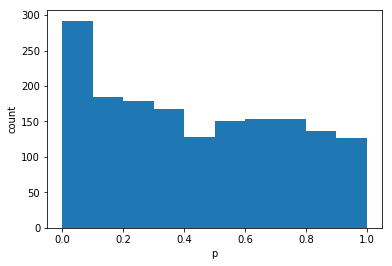

In [2]:
# Calculate the Wilcoxon rank sum test.
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ranksums.html

from scipy.stats import ranksums

numTrialCor, dimFeature = feature_cor.shape
numTrialIncor, dimFeature = feature_incor.shape

# for each channel*freq
pVal = list()
for i in range(dimFeature):
    T, p = ranksums(feature_cor[:,i], feature_incor[:,i])
    pVal.append(p)
    

import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(pVal)
plt.xlabel('p')
plt.ylabel('count')

Text(0.5,0,'channel')

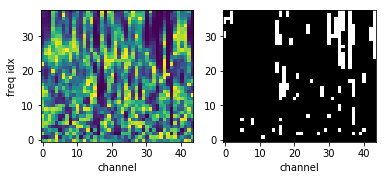

In [3]:
pVal2D = np.reshape(pVal, (38, 44))
idxSelectedFeature = pVal2D<0.05

plt.subplot(121)
plt.imshow(pVal2D)
plt.gca().invert_yaxis()
plt.xlabel('channel')
plt.ylabel('freq idx')
plt.subplot(122)
plt.imshow(idxSelectedFeature, cmap='gray')
plt.gca().invert_yaxis()
plt.xlabel('channel')

In [6]:
# print selected channels
Fs = [ 1,     2,     3,     4,     5,     6,     7,     8,     9,    10,    11,    12,    13,    15,
    17,    19,    21,    23,    25,    27,    29,    32,    36,    40,    44,    48,    52,    56,
    64,    68,    72,    76,    80,    84,    88,    92,    96,   100]

pTh = 0.05
#pTh = 0.1 # increase a bit 
#pTh = 0.15 # increase more

#plt.imshow(range(42),Fs, pVal2D)
listSelectedFeature = list()
for ch in range(44):
    for i in range(38):
        if pVal2D[i][ch] < pTh: #idxSelectedFeature[i,ch]:
            print("ch={}, freq={}".format(ch+1,Fs[i]))
            listSelectedFeature.append((ch+1,i))
np.savetxt("listSelectedFeature_p{}.txt".format(pTh), listSelectedFeature)
print(listSelectedFeature)
print(len(listSelectedFeature))

ch=1, freq=72
ch=1, freq=76
ch=1, freq=88
ch=1, freq=92
ch=2, freq=92
ch=3, freq=88
ch=3, freq=92
ch=3, freq=96
ch=3, freq=100
ch=6, freq=4
ch=6, freq=7
ch=9, freq=6
ch=9, freq=7
ch=12, freq=2
ch=15, freq=4
ch=16, freq=29
ch=16, freq=32
ch=16, freq=36
ch=16, freq=64
ch=16, freq=68
ch=16, freq=72
ch=16, freq=76
ch=16, freq=80
ch=16, freq=84
ch=16, freq=88
ch=17, freq=3
ch=17, freq=4
ch=17, freq=5
ch=17, freq=7
ch=17, freq=13
ch=17, freq=15
ch=17, freq=17
ch=17, freq=19
ch=17, freq=21
ch=17, freq=64
ch=17, freq=68
ch=17, freq=72
ch=17, freq=96
ch=17, freq=100
ch=18, freq=15
ch=18, freq=17
ch=18, freq=19
ch=18, freq=21
ch=18, freq=23
ch=18, freq=25
ch=18, freq=27
ch=18, freq=29
ch=18, freq=32
ch=19, freq=19
ch=19, freq=21
ch=19, freq=96
ch=19, freq=100
ch=20, freq=64
ch=20, freq=68
ch=21, freq=13
ch=22, freq=3
ch=22, freq=15
ch=22, freq=25
ch=22, freq=27
ch=23, freq=3
ch=25, freq=8
ch=25, freq=76
ch=25, freq=80
ch=25, freq=84
ch=26, freq=23
ch=28, freq=3
ch=29, freq=15
ch=29, freq=17
ch=2

In [7]:
# Now, select features 
idx=np.array(pVal)<pTh
selected_feature_cor = feature_cor[:,idx]
selected_feature_incor = feature_incor[:,idx]

In [8]:
print(selected_feature_cor.shape)
print(selected_feature_incor.shape)

(52, 179)
(108, 179)


In [9]:
# let's standardize data
X = np.concatenate((selected_feature_cor, selected_feature_incor),axis=0)
Y = np.append(np.ones(numTrialCor),-np.ones(numTrialIncor))

from sklearn import preprocessing
# http://scikit-learn.org/stable/modules/preprocessing.html
X_scaled = preprocessing.scale(X)

print(X_scaled.mean(axis=0))
print(X_scaled.std(axis=0))

[-4.21884749e-16 -1.18238752e-15 -4.77395901e-16 -3.48610030e-15
  1.05471187e-15 -4.80171458e-16 -8.88178420e-16 -1.79856130e-15
 -1.79856130e-15 -7.97972799e-16  2.29261055e-15 -1.81521465e-15
  1.17683641e-15  1.26287869e-16 -4.49640325e-16 -1.44884105e-15
 -2.07611706e-15  4.38538095e-16  1.00197628e-15  8.16013923e-16
  8.88178420e-17 -5.57887070e-16 -5.05151476e-16 -5.27355937e-16
 -1.01030295e-15 -7.54951657e-16  1.04360964e-15  2.96429548e-15
  1.03805853e-15 -2.86437540e-15 -2.86159985e-15  3.60544927e-15
 -3.60822483e-16 -1.52100554e-15 -1.75415238e-15 -8.32667268e-16
  1.99007477e-15  3.23074900e-15  2.24265051e-15  1.69864123e-15
  2.46469511e-15 -9.04831765e-16 -4.80171458e-15 -3.83026943e-15
  2.26485497e-15  1.39888101e-15 -9.54791801e-16  5.82867088e-16
 -9.88098492e-16  1.52100554e-15  1.59872116e-15  6.99440506e-16
 -9.88098492e-16  1.52100554e-15 -1.67643677e-15  4.16333634e-16
  9.99200722e-16  4.86277685e-15  7.77156117e-16  5.32907052e-16
  3.83026943e-16  6.32827

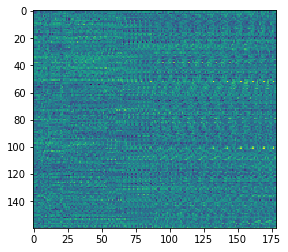

In [10]:
plt.imshow(X_scaled)

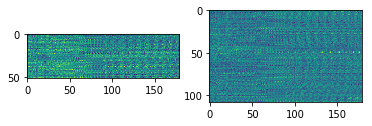

In [11]:
# compare mean
plt.subplot(121)
plt.imshow(X_scaled[Y>0,:])
plt.subplot(122)
plt.imshow(X_scaled[Y<0,:])

In [12]:
# save to a file
np.savetxt("WT_3s_X_p{}.txt".format(pTh),X)   # 44x45
np.savetxt("WT_3s_X_scaled_p{}.txt".format(pTh),X_scaled)   # 44x45
np.savetxt("WT_3s_Y_p{}.txt".format(pTh), Y)         # 44x1

# copy these files to data/